In [16]:
import pandas as pd
from string import punctuation
 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
# from keras.preprocessing.image import ImageDataGenerator 
from keras.datasets import fashion_mnist 
from keras import models 
from keras import layers 
from keras import optimizers 
from keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
# import h5py

In [17]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [18]:
print('x_train Shape: {}'.format(x_train.shape))
print('x_test Shape: {}'.format(x_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


In [19]:
num_classes = 10
classes = { 0:"airplane(літак)", 
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

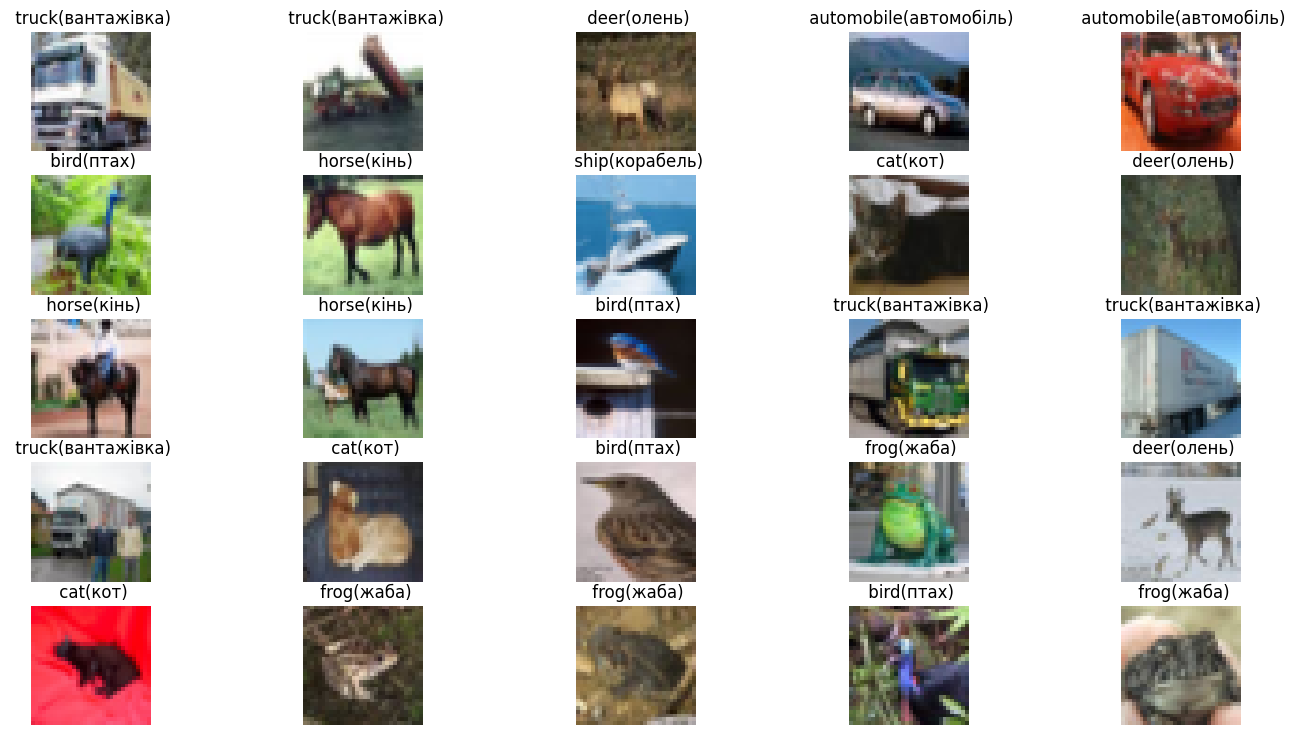

In [20]:
plt.figure(figsize=(17,9))
for i in range(1, 26):
  plt.subplot(5, 5, i-1 + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f" {classes[y_train[i][0]]}")

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Преобразуем метки в категории


y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}\ny_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (50000, 32, 32, 3), x_test: (10000, 32, 32, 3)
y_train: (50000, 10), y_test: (10000, 10)


In [25]:
# model = models.load_model("basesd_model_new13_03_23_00.h5")
model = models.load_model("basesd_model_new_14_03_dotren.h5")
# model = models.load_model("basesd_model_new.h5")


In [27]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


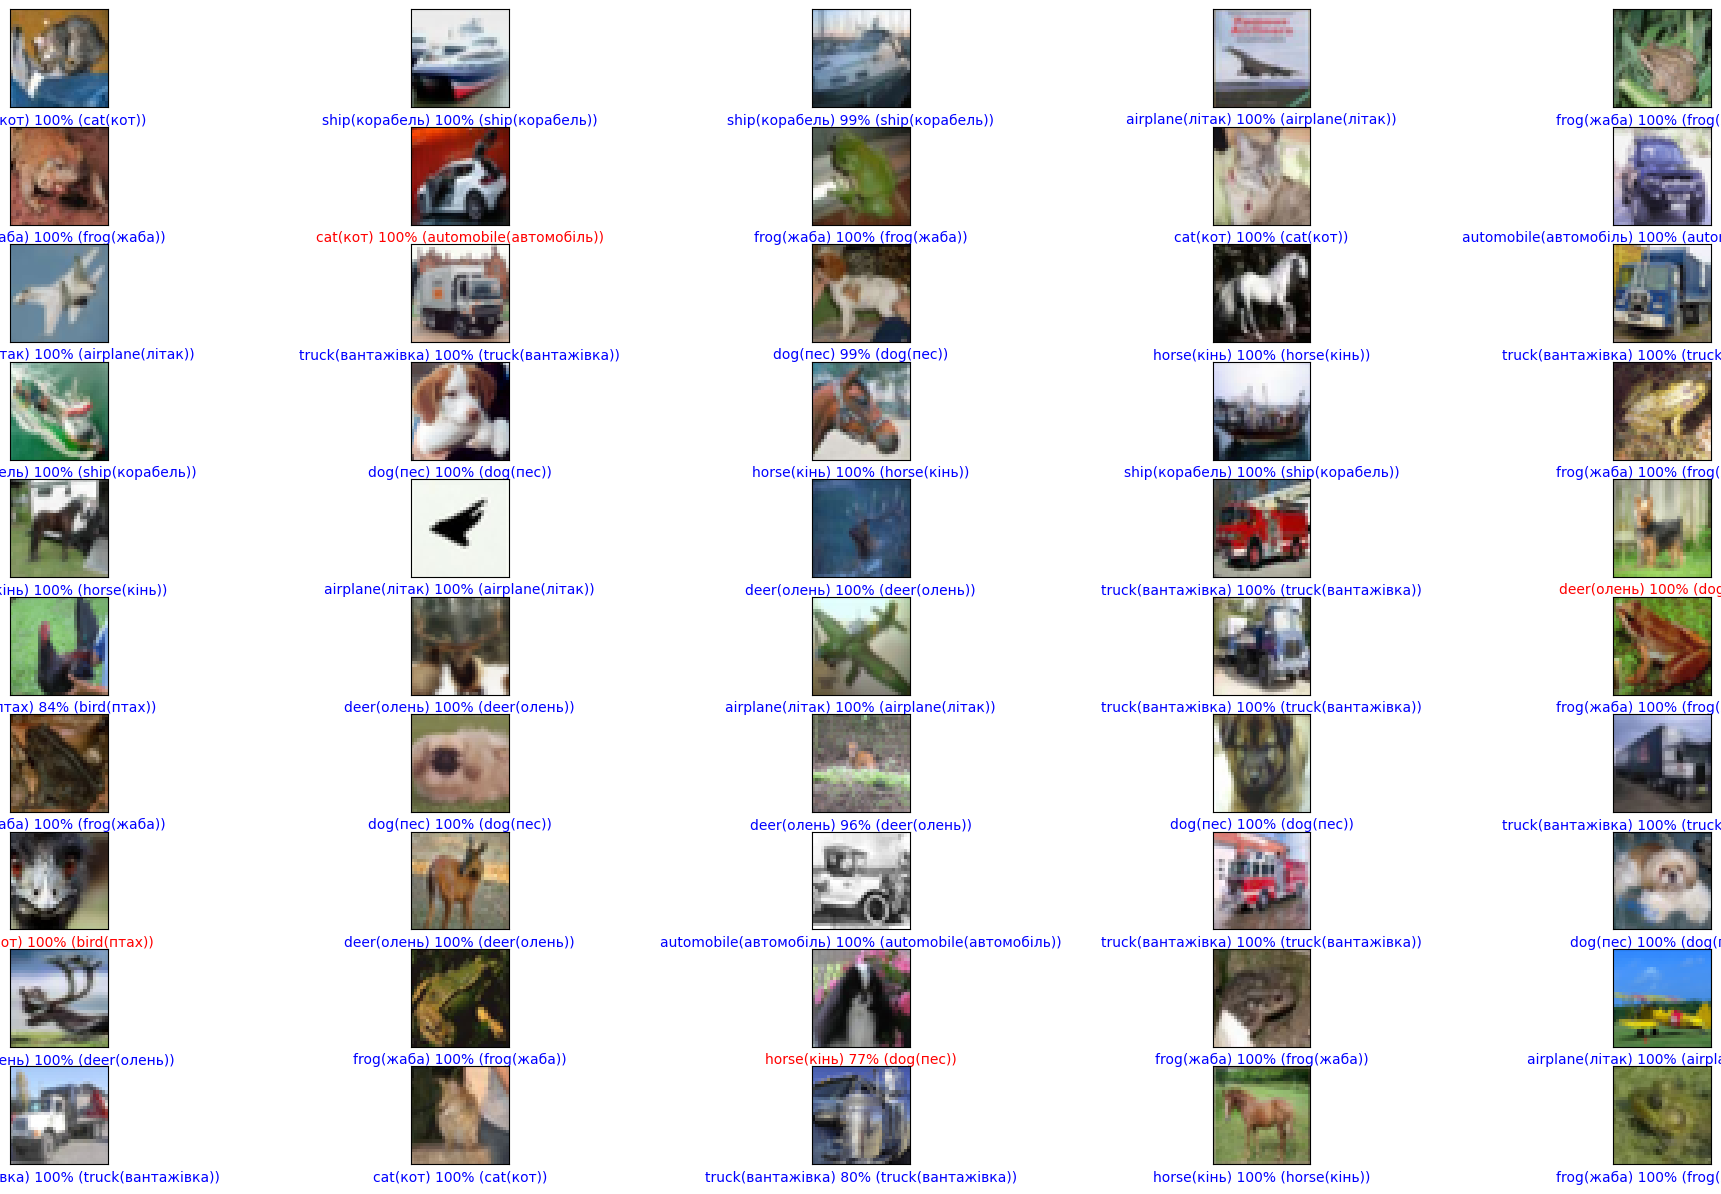

In [28]:
def plot_image(i, predictions_array, true_label, img, ):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    
 

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
         
    else:
        color = 'red'
        

    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                         100*np.max(predictions_array),
                                         classes[true_label]),
                                         color=color)
num_images = 50
num_rows = 10
num_cols = 5
sum = 0
plt.figure(figsize=(num_images/2, 15))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions[i], y_test[i], x_test[i],  )
   

In [29]:


sum = 0
num_images = 28

for i in range(num_images): 
  predicted_label = np.argmax( predictions[i])
  true_label = np.argmax(y_test[i])
    
  print (f' True class  {classes[true_label]}),       predicted {classes[predicted_label]}')
  if predicted_label == true_label:
    sum= sum+1
    
print (f'передбачиних  {sum} з {num_images}, {sum/num_images*100} %') 
   

 True class  cat(кот)),       predicted cat(кот)
 True class  ship(корабель)),       predicted ship(корабель)
 True class  ship(корабель)),       predicted ship(корабель)
 True class  airplane(літак)),       predicted airplane(літак)
 True class  frog(жаба)),       predicted frog(жаба)
 True class  frog(жаба)),       predicted frog(жаба)
 True class  automobile(автомобіль)),       predicted cat(кот)
 True class  frog(жаба)),       predicted frog(жаба)
 True class  cat(кот)),       predicted cat(кот)
 True class  automobile(автомобіль)),       predicted automobile(автомобіль)
 True class  airplane(літак)),       predicted airplane(літак)
 True class  truck(вантажівка)),       predicted truck(вантажівка)
 True class  dog(пес)),       predicted dog(пес)
 True class  horse(кінь)),       predicted horse(кінь)
 True class  truck(вантажівка)),       predicted truck(вантажівка)
 True class  ship(корабель)),       predicted ship(корабель)
 True class  dog(пес)),       predicted dog(пес)
 True c